# Import data and set default options

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 
from scipy.stats import randint
import lazypredict
from lazypredict.Supervised import LazyClassifier

df1 = pd.read_csv('data/sm_data_features.csv')

# set default options for libraries:

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_style("white")
sns.set_palette("mako")

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ChEMBL ID         6809 non-null   object 
 1   InChI Key         6809 non-null   object 
 2   Name              6809 non-null   object 
 3   SMILES            6809 non-null   object 
 4   Type              6809 non-null   object 
 5   Max Phase         6809 non-null   float64
 6   Targets           6809 non-null   float64
 7   Bioactivities     6809 non-null   float64
 8   MW                6809 non-null   float64
 9   LogP              6809 non-null   float64
 10  MolMR             6809 non-null   float64
 11  H Donors          6809 non-null   float64
 12  H Acceptors       6809 non-null   float64
 13  TPSA              6809 non-null   float64
 14  Heavy Atom Count  6809 non-null   float64
 15  Aromatic Rings    6809 non-null   float64
 16  Rotatable Bonds   6809 non-null   float64


# Prepare dataset and train multiple ML models

In [3]:
#preprocess data, specifically the target
#rerunning this cell will disrupt the target column
df1['Max Phase'] = df1['Max Phase'].map({1:0,2:1,3:2,4:3})

In [4]:
#classify features and the final target
X = df1[['Targets', 'Bioactivities', 'MW', 'LogP', 'MolMR', 'H Donors',
       'H Acceptors', 'TPSA', 'Heavy Atom Count', 'Aromatic Rings',
       'Rotatable Bonds', 'Ring Count']]
Y = df1['Max Phase']

#normalize feature data before training models (min max model)
#brings all values into a similar range to reduce potential bias
X_norm = (X-X.min())/(X.max()-X.min())

#split dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2)

In [5]:
# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:20<00:00,  1.39it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:17<00:00,  1.67it/s]


In [6]:
predictions_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.57,0.39,None,0.53,0.95
RandomForestClassifier,0.56,0.38,None,0.52,1.54
LGBMClassifier,0.55,0.37,None,0.51,0.30
LabelSpreading,0.49,0.37,None,0.49,2.46
BaggingClassifier,0.51,0.37,None,0.50,0.53
LabelPropagation,0.49,0.37,None,0.48,1.30
GaussianNB,0.40,0.36,None,0.40,0.01
KNeighborsClassifier,0.49,0.36,None,0.48,0.14
NearestCentroid,0.41,0.34,None,0.41,0.00


# Run best model

In [7]:
#Improve hyperparameters for the classifier model
#The code below is used in case we want to explore model optimization. 
#This is usually not needed as the classifier does a good job for this dataset.

param_dist = {'n_estimators': randint(50,250),
              'max_depth': randint(1,20)}

# Create a random forest classifier
clf = ExtraTreesClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(clf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 166}


In [8]:
#train model with optimized parameters
XTclf = ExtraTreesClassifier(n_estimators=120, max_depth=18, random_state=0)
XTclf.fit(X_train, Y_train)

#set up prediction values
Y_pred = XTclf.predict(X_test)

# Evaluate the model

In [9]:
#General prediction scores
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='micro')
recall = recall_score(Y_test, Y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5624082232011748
Precision: 0.5624082232011748
Recall: 0.5624082232011748


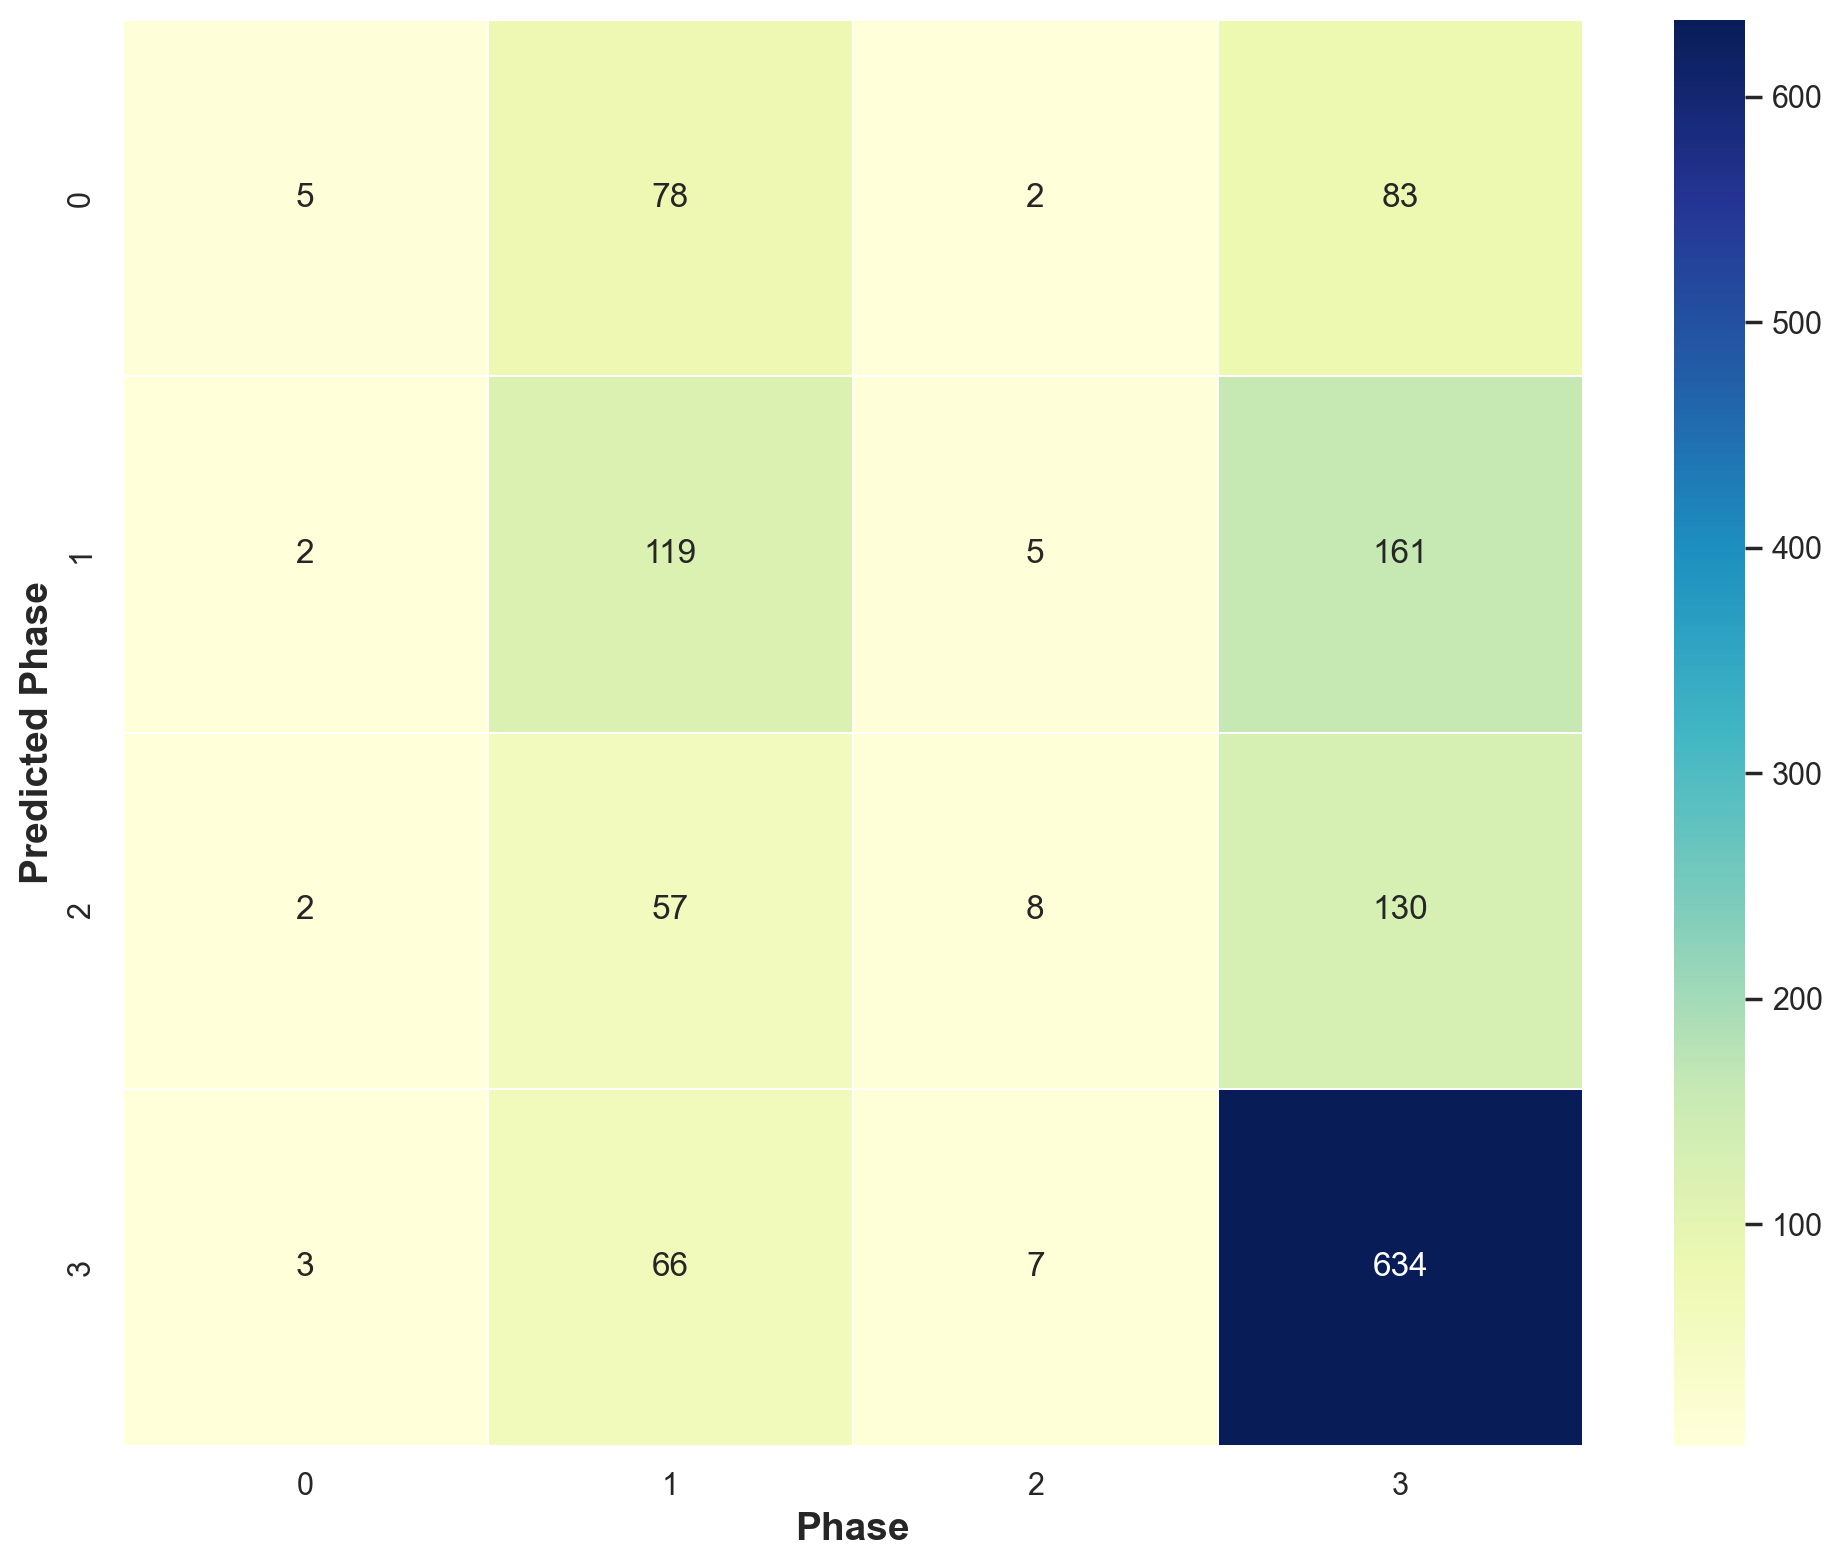

In [10]:
#confusion matrix to compare actual and predicted targets
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(10,8))

sns.heatmap(cm, linewidth=.1, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Phase', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Phase', fontsize=14, fontweight='bold')
plt.tight_layout()

plt.show()

#ConfusionMatrixDisplay(confusion_matrix=cm).plot()

#Phase1 = 0, Phase2 = 1, Phase3 = 2, Approved = 3

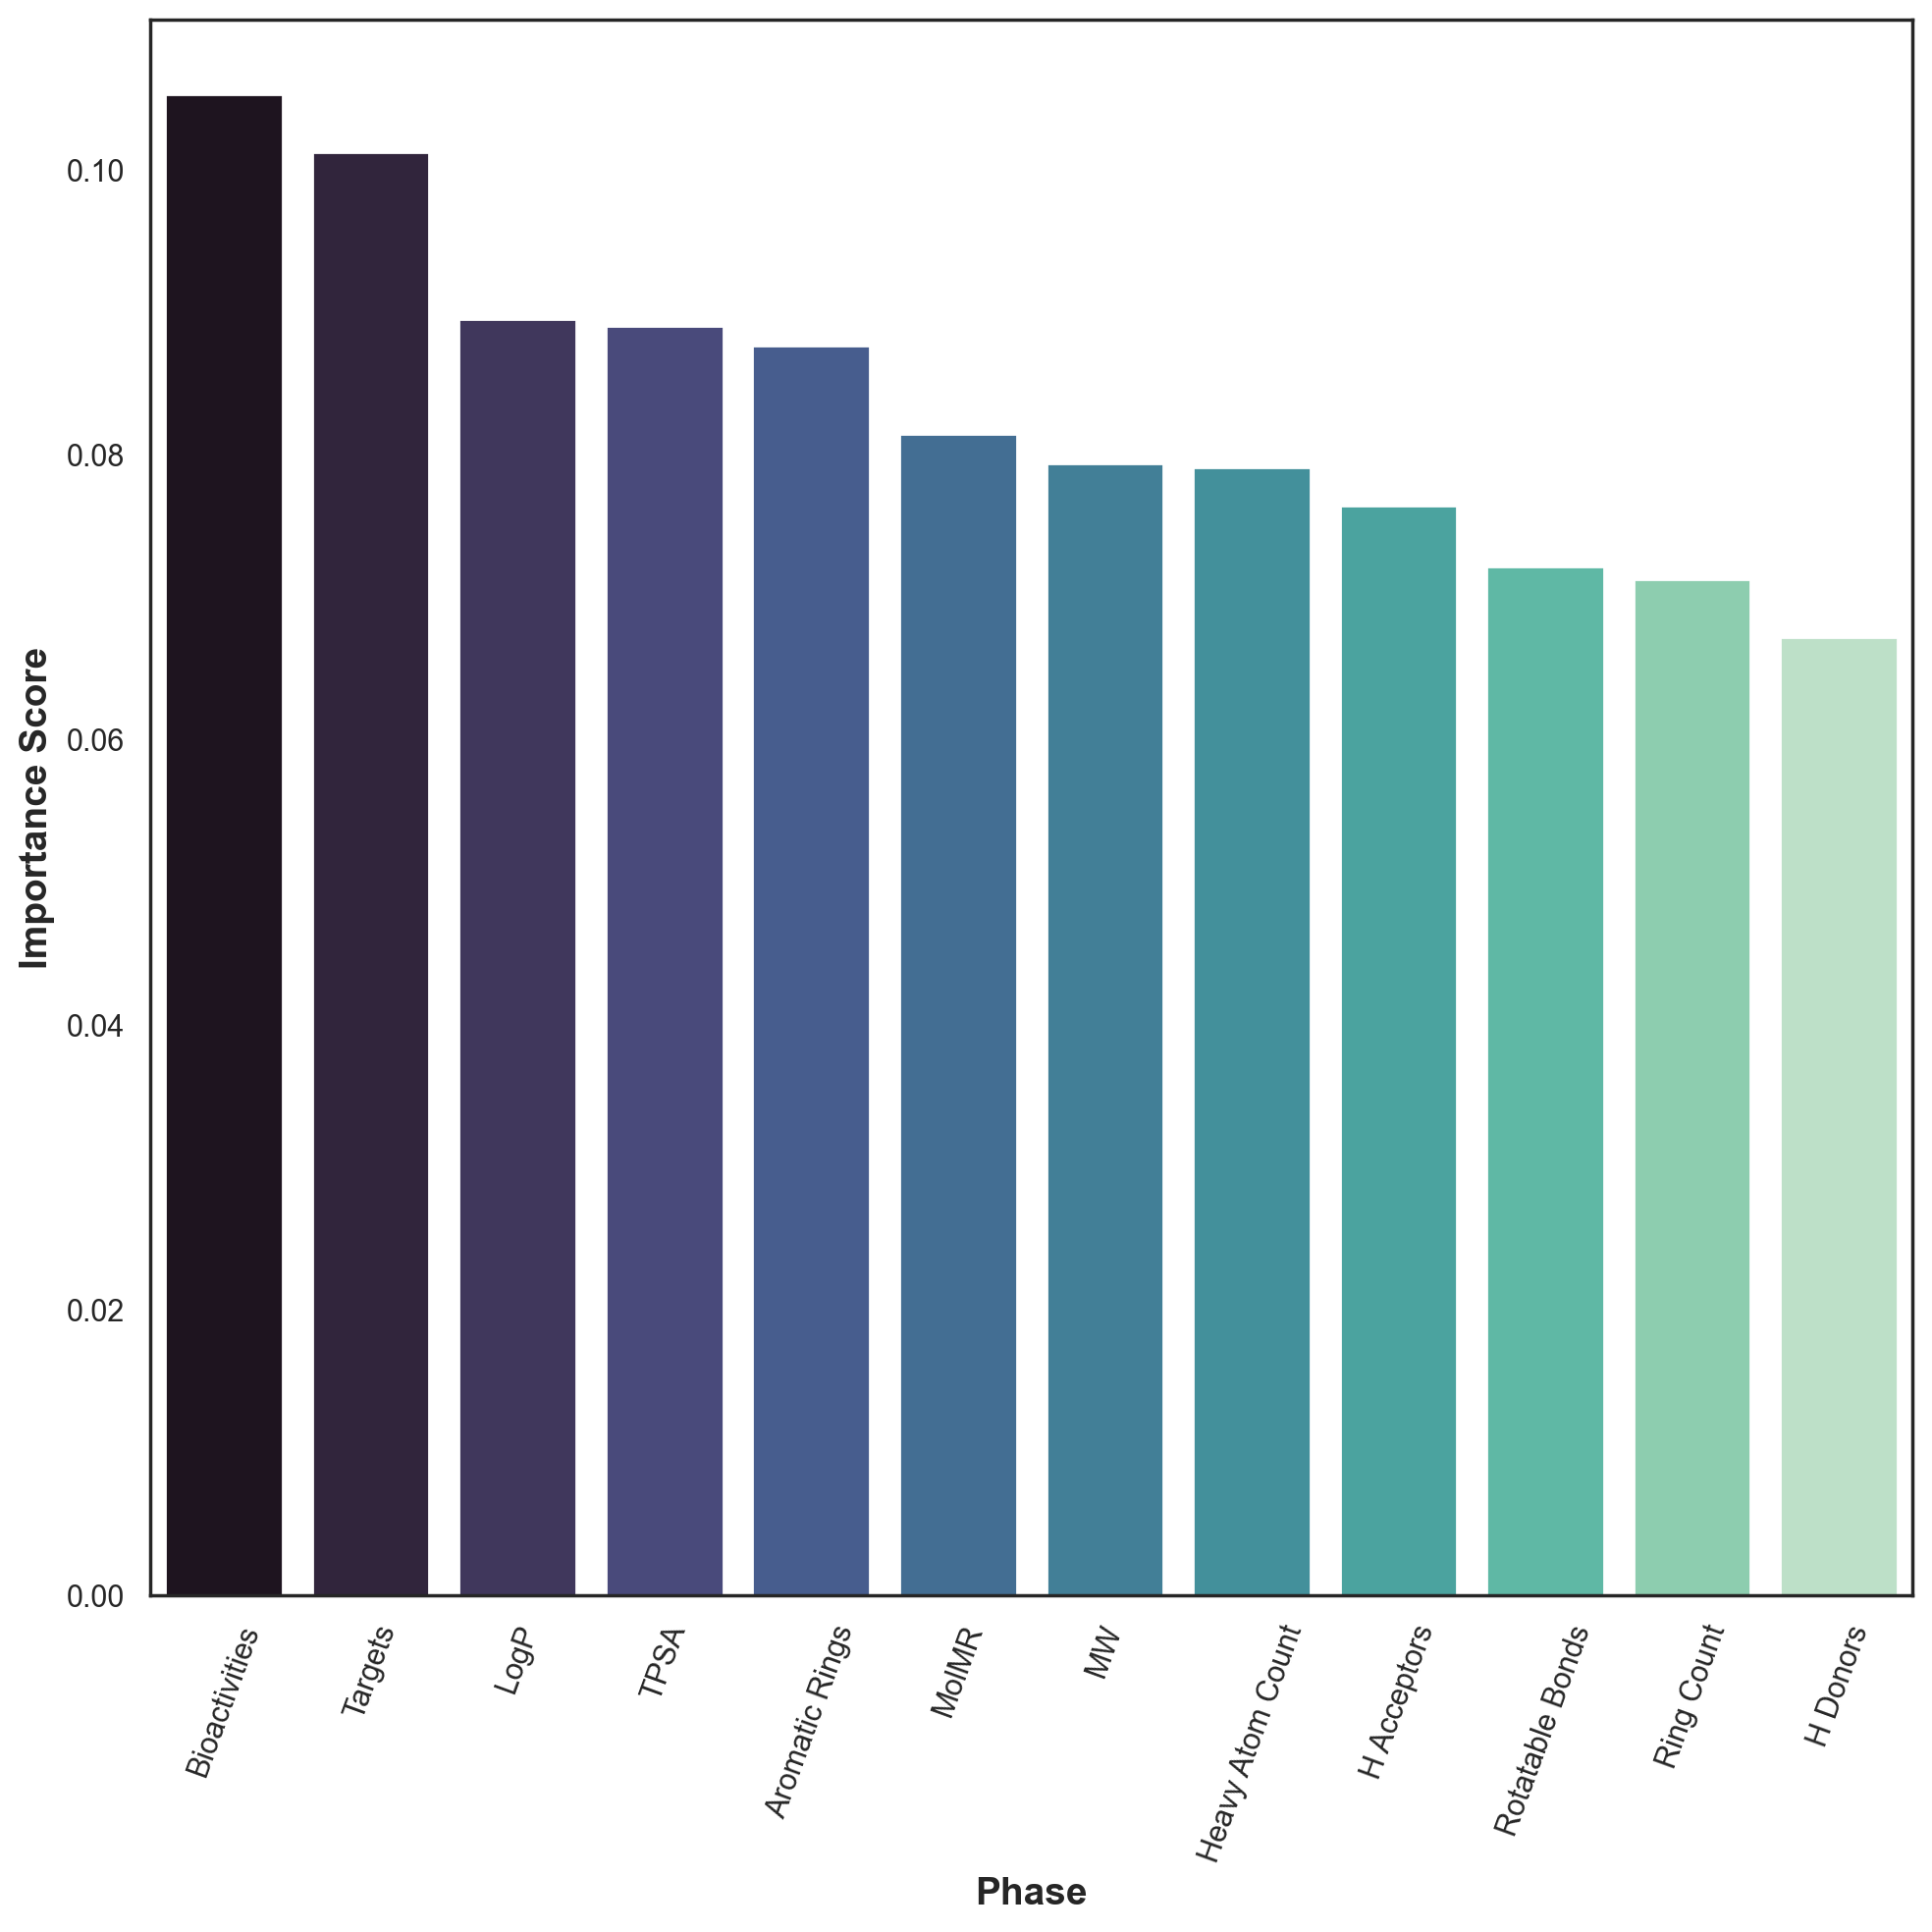

In [11]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(XTclf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

df2 = pd.DataFrame(feature_importances)
df2.reset_index(inplace=True)
df2.rename(columns={'index':'Feature', 0:'Value'}, inplace=True)
df2

# Plot a simple bar chart
plt.figure(figsize=(10,10))

sns.barplot(data=df2, x='Feature', y='Value', palette='mako')
plt.xlabel('Phase', fontsize=14, fontweight='bold')
plt.ylabel('Importance Score', fontsize=14, fontweight='bold')
plt.xticks(rotation=70)
plt.tight_layout()

plt.show()

# Summary

### The machine learning model provides an accuracy of around 56.2% for this dataset. Based on the confusion matrix data, this model is best at predicting the drug discovery stage for the 'Phase 2' and 'Approved' stages. This suggests that the given molecular features are not adequate enough to predict clinical outcome. Still, for this model, the most important features are the 'Targets' and 'Bioactivities' values. The other features are also important as the feature importance scores are fairly evenly distributed.

### These models could potentially be optimized with additional molecular parameters or fingerprint features of the individual small molecules.